In [21]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

In [22]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [23]:
coreset_idx = [13792,17049,27470,35798,37416,38974,40664,46805,46996,47577]

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='/vulcanscratch/psando/cifar-10/', train=True, download=False, transform=transform_test)

coreset = torch.utils.data.Subset(trainset, coreset_idx)

coresetloader = torch.utils.data.DataLoader(coreset, batch_size=10, shuffle=False, num_workers=1)

['dog', 'deer', 'bird', 'plane', 'ship', 'car', 'frog', 'cat', 'horse', 'truck']


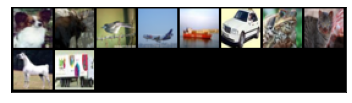

In [14]:
imgs, labels = iter(coresetloader).next()
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
print([classes[i] for i in labels])

show(make_grid(imgs))